# MLP

Importy

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Montowanie Google Drive

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Wczytanie danych do obiektów numpy

In [25]:
file_path = '/content/drive/MyDrive/data.csv'
dataframe = pd.read_csv(file_path, header=None, skiprows=1)

# usunięcie szkodliwych kolumn
dataframe = dataframe.drop([0], axis=1, errors='ignore')

if 32 in dataframe.columns:
    dataframe = dataframe.drop([32], axis=1)

dataframe[1] = dataframe[1].map({'M': 1, 'B': 0})

y = dataframe[1].to_numpy()
X = dataframe.drop(1, axis=1).to_numpy()

print(X.shape)
print(y.shape)

(569, 30)
(569,)


Skalowanie

In [26]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print("X przeskalowane. Wartości są teraz w zakresie [0, 1].")

X przeskalowane. Wartości są teraz w zakresie [0, 1].


Uczenie (Badanie A)

In [27]:
hidden_layer_sizes = [
    (30,), (30, 30), (60,), (60, 60), (100,),
    (20,), (50, 50, 50)
]
scores_hls = {}
best_hls = None
best_score = 0

for l in hidden_layer_sizes:
  mlp = MLPClassifier(hidden_layer_sizes=l, random_state=1410, max_iter=500)
  score = cross_val_score(mlp, X, y, cv=5, scoring='balanced_accuracy', n_jobs=-1).mean()
  scores_hls[str(l)] = score
  print("Warstwy %s, balanced_accuracy: %2.4f" %(str(l), score))

  if score > best_score:
    best_score = score
    best_hls = l


Warstwy (30,), balanced_accuracy: 0.9681
Warstwy (30, 30), balanced_accuracy: 0.9756
Warstwy (60,), balanced_accuracy: 0.9746
Warstwy (60, 60), balanced_accuracy: 0.9647
Warstwy (100,), balanced_accuracy: 0.9755
Warstwy (20,), balanced_accuracy: 0.9647
Warstwy (50, 50, 50), balanced_accuracy: 0.9648


Wykresy (Badanie A)

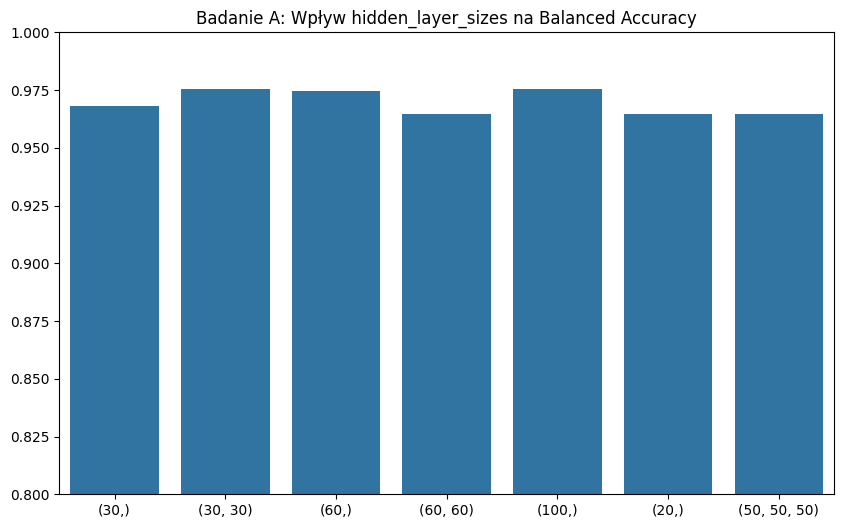

In [28]:
plt.figure(figsize=(10,6))
plt.title('Badanie A: Wpływ hidden_layer_sizes na Balanced Accuracy')
plt.ylim([0.8,1.0])
sns.barplot(x=list(scores_hls.keys()), y=list(scores_hls.values()))
plt.show()

Wpływ funkcji aktywacji (Badanie B)

In [29]:
activation_options = ['identity', 'logistic', 'tanh', 'relu']
scores_act = {}
best_act = None
best_score_b = 0

for activation in activation_options:

  mlp = MLPClassifier(hidden_layer_sizes=best_hls, activation=activation, random_state=1410, max_iter=500)

  score = cross_val_score(mlp, X, y, cv=5, scoring='balanced_accuracy', n_jobs=-1).mean()
  scores_act[activation] = score
  print("Aktywacja %s, balanced_accuracy: %2.4f" %(activation, score))

  if score > best_score_b:
      best_score_b = score
      best_act = activation

Aktywacja identity, balanced_accuracy: 0.9704
Aktywacja logistic, balanced_accuracy: 0.9719
Aktywacja tanh, balanced_accuracy: 0.9694
Aktywacja relu, balanced_accuracy: 0.9756


Wykresy (Badanie B)

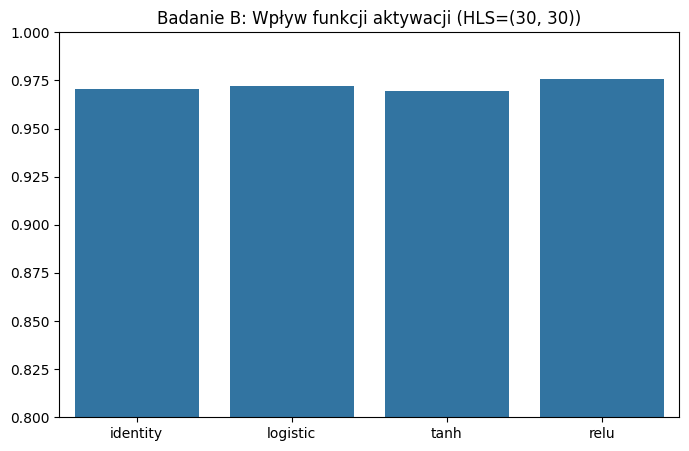

In [30]:
plt.figure(figsize=(8, 5))
plt.title(f'Badanie B: Wpływ funkcji aktywacji (HLS={best_hls})')
plt.ylim([0.8, 1.0])
sns.barplot(x=list(scores_act.keys()), y=list(scores_act.values()))
plt.show()

Solver (Badanie C)

In [31]:
solvers = ['lbfgs', 'sgd', 'adam']
scores_solv = {}
best_solv = None
best_score_c = 0

for s in solvers:
  max_iter_val = 100 if s == 'lbfgs' else 500

  mlp = MLPClassifier(
      hidden_layer_sizes=best_hls,
      activation=best_act,
      solver=s,
      random_state=1410,
      max_iter=max_iter_val
  )

  score = cross_val_score(mlp, X, y, cv=5, scoring='balanced_accuracy', n_jobs=-1).mean()
  scores_solv[s] = score
  print("Solver %s, balanced_accuracy: %2.4f" %(s, score))

  if score > best_score_c:
      best_score_c = score
      best_solv = s


Solver lbfgs, balanced_accuracy: 0.9517
Solver sgd, balanced_accuracy: 0.9413
Solver adam, balanced_accuracy: 0.9756


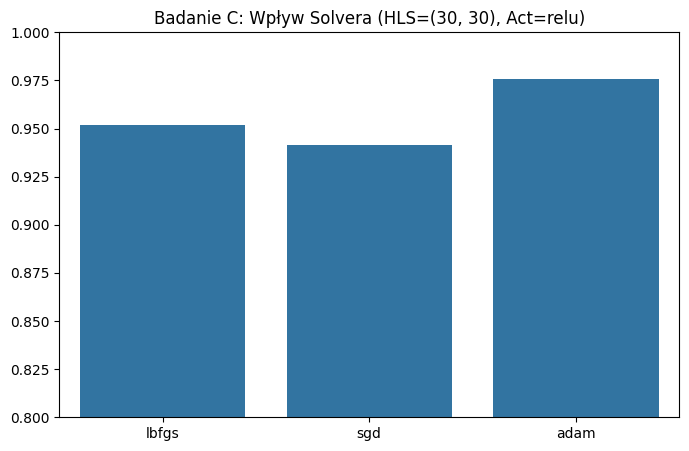

In [32]:
plt.figure(figsize=(8, 5))
plt.title(f'Badanie C: Wpływ Solvera (HLS={best_hls}, Act={best_act})')
plt.ylim([0.8, 1.0])
sns.barplot(x=list(scores_solv.keys()), y=list(scores_solv.values()))
plt.show()